STEP 1:Mount google drive

In [6]:
from google.colab import files
uploaded = files.upload()

Saving in-vehicle-coupon-recommendation.csv to in-vehicle-coupon-recommendation.csv


STEP 2: Import CSV data as pandas DataFrame

In [7]:
import pandas as pd
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")

STEP 3: Show top 5 records

In [8]:
print("Top 5 records:")
print(df.head())

Top 5 records:
       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                 

STEP 4: Shape of the dataset

In [10]:
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (12684, 26)


STEP 5: Check for missing values, duplicates, data types, unique values per column, and statistics

In [11]:
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

print("\nData types:")
print(df.dtypes)

print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

print("\nSummary statistics:")
print(df.describe(include='all'))


Missing values per column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Number of duplicate rows: 74

Data types:
destination             object
passanger               object
weather                 object
temperature              int64
time        

STEP 6: Print all unique categories in each categorical column

In [12]:
print("\nUnique categories in categorical columns:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col} categories:\n{df[col].unique()}")


Unique categories in categorical columns:

destination categories:
['No Urgent Place' 'Home' 'Work']

passanger categories:
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

weather categories:
['Sunny' 'Rainy' 'Snowy']

time categories:
['2PM' '10AM' '6PM' '7AM' '10PM']

coupon categories:
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

expiration categories:
['1d' '2h']

gender categories:
['Female' 'Male']

age categories:
['21' '46' '26' '31' '41' '50plus' '36' 'below21']

maritalStatus categories:
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

education categories:
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

occupation categories:
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design E

STEP 7: Define and print categorical and numerical columns

In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("\nCategorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)


Categorical Columns:
['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

Numerical Columns:
['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


STEP 8: Handle missing values

In [14]:
# Fill missing values in numerical columns with the mean
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


STEP 9: Label Encode categorical variables

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nDataset after label encoding:")
print(df.head())


Dataset after label encoding:
   destination  passanger  weather  temperature  time  coupon  expiration  \
0            1          0        2           55     2       4           0   
1            1          1        2           80     0       2           1   
2            1          1        2           80     0       1           1   
3            1          1        2           80     2       2           1   
4            1          1        2           80     2       2           0   

   gender  age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0       0    0              3  ...            4          0   
1       0    0              3  ...            4          0   
2       0    0              3  ...            4          0   
3       0    0              3  ...            4          0   
4       0    0              3  ...            4          0   

   RestaurantLessThan20  Restaurant20To50  toCoupon_GEQ5min  \
0                     1                 0                 1   
1      

STEP 10: Normalize numerical columns

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nDataset after normalization:")
print(df.head())


Dataset after normalization:
   destination  passanger  weather  temperature  time  coupon  expiration  \
0            1          0        2          0.5     2       4           0   
1            1          1        2          1.0     0       2           1   
2            1          1        2          1.0     0       1           1   
3            1          1        2          1.0     2       2           1   
4            1          1        2          1.0     2       2           0   

   gender  age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0       0    0              3  ...            4          0   
1       0    0              3  ...            4          0   
2       0    0              3  ...            4          0   
3       0    0              3  ...            4          0   
4       0    0              3  ...            4          0   

   RestaurantLessThan20  Restaurant20To50  toCoupon_GEQ5min  \
0                     1                 0               0.0   
1       

STEP 11: Outlier Detection and Removal using IQR


 Boxplots BEFORE removing outliers:


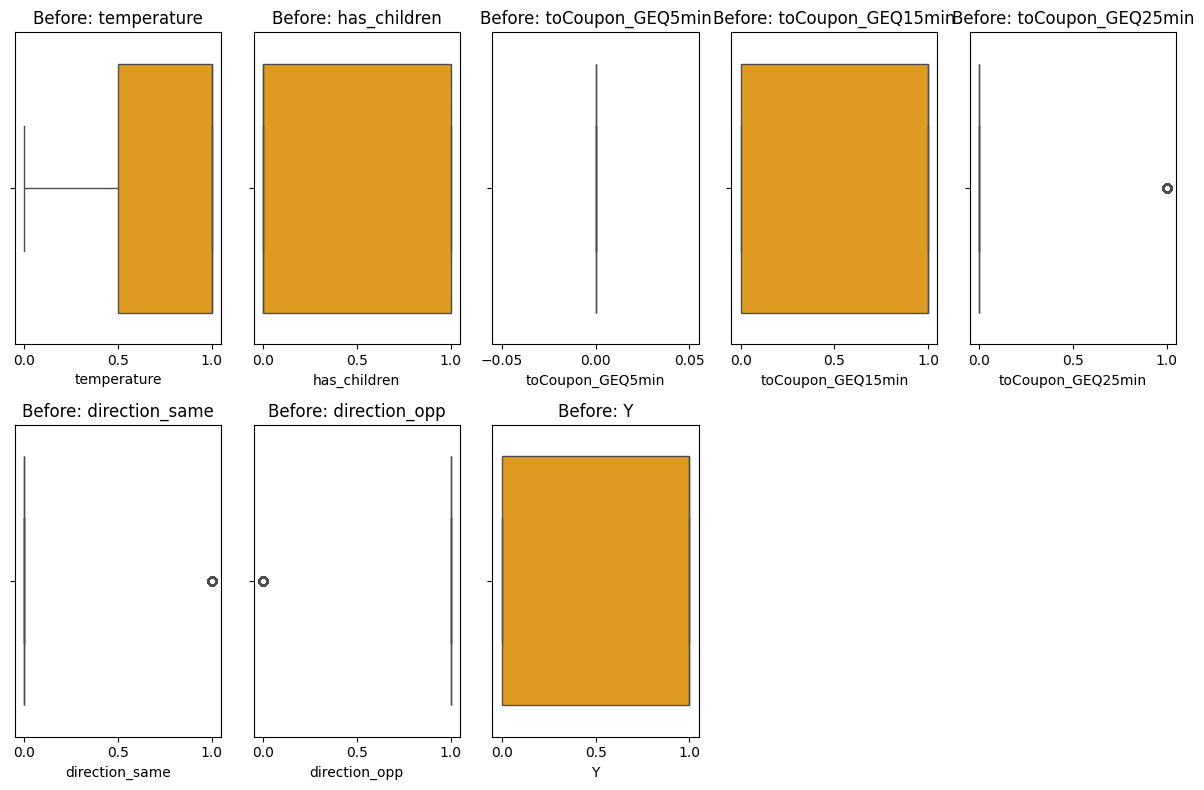


 Shape after outlier removal: (8449, 26)

 Boxplots AFTER removing outliers:


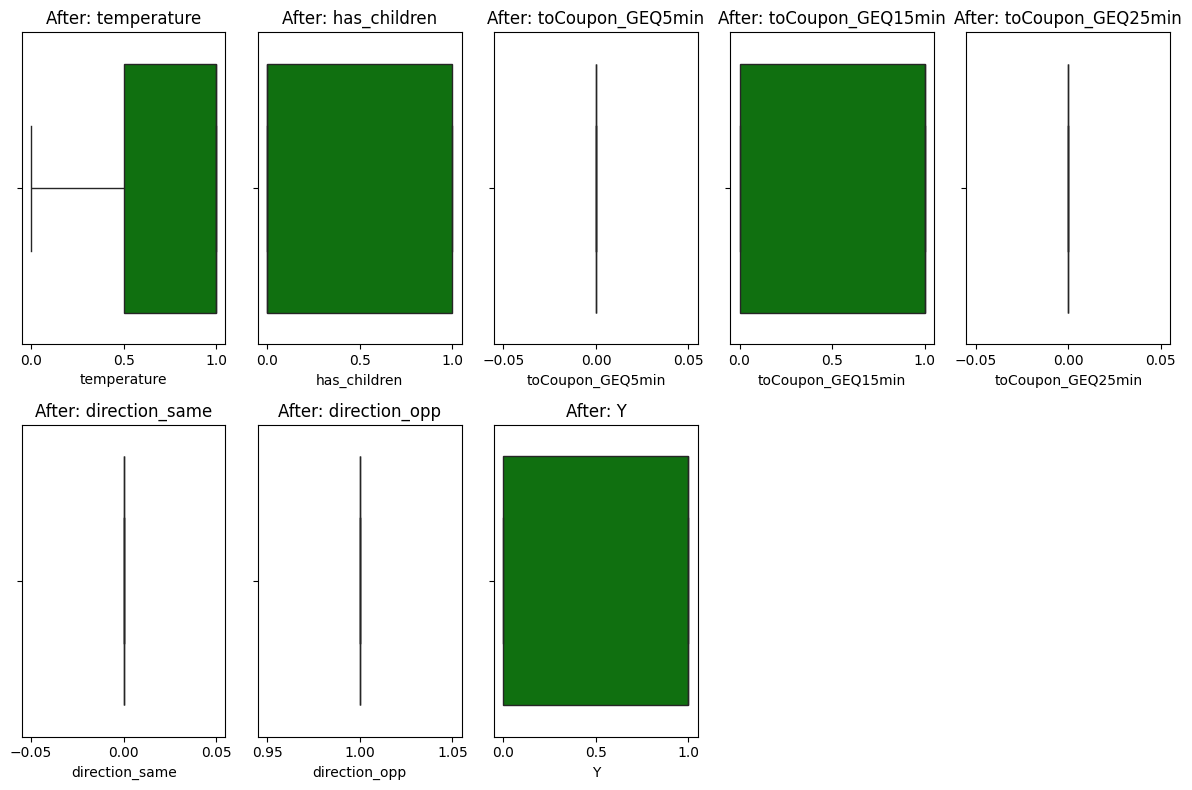

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots BEFORE removing outliers
print("\n Boxplots BEFORE removing outliers:")
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols) // 2 + 1, i + 1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Before: {col}')
plt.tight_layout()
plt.show()

# Remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers_iqr(df, numerical_cols)

print("\n Shape after outlier removal:", df.shape)

# Boxplots AFTER removing outliers
print("\n Boxplots AFTER removing outliers:")
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols) // 2 + 1, i + 1)
    sns.boxplot(x=df[col], color='green')
    plt.title(f'After: {col}')
plt.tight_layout()
plt.show()

STEP 12: Data Visualization


 Histograms of Numerical Columns:


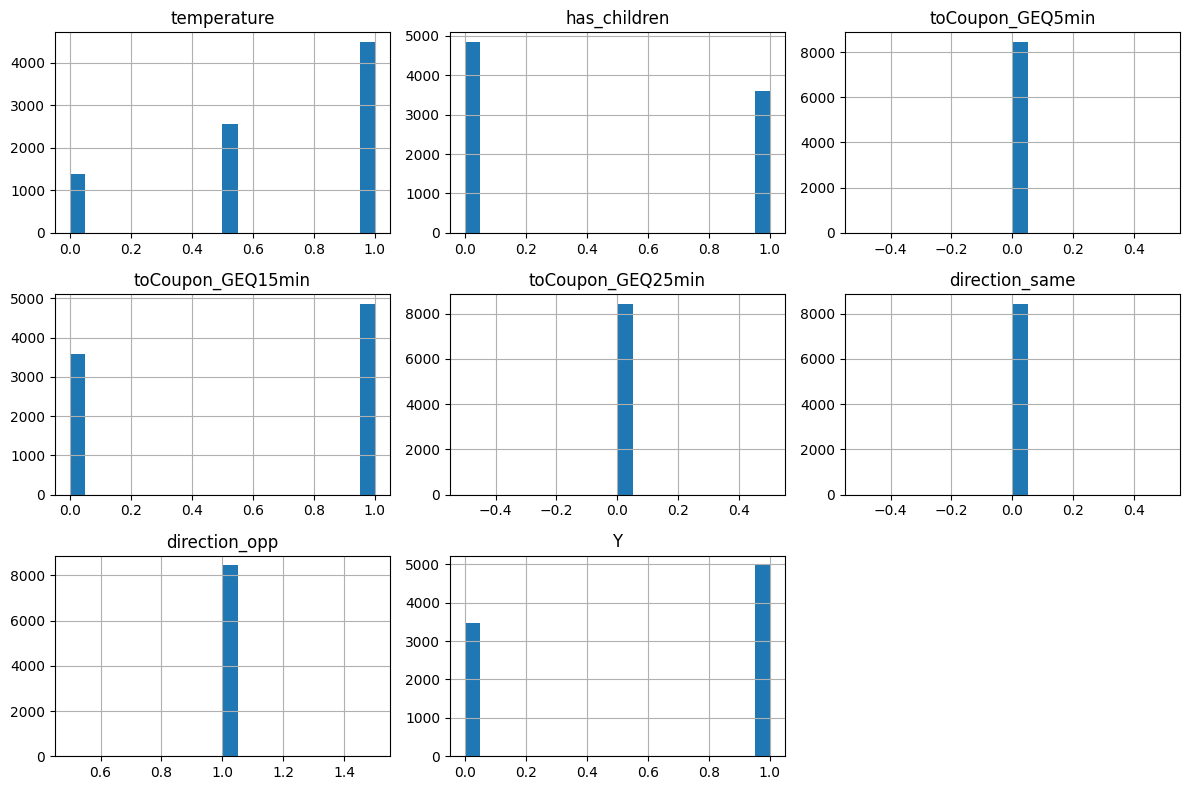


 Countplots of Categorical Columns:


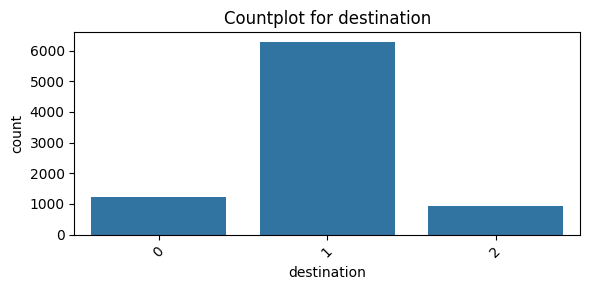

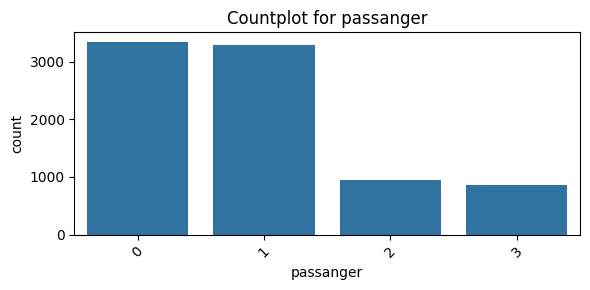

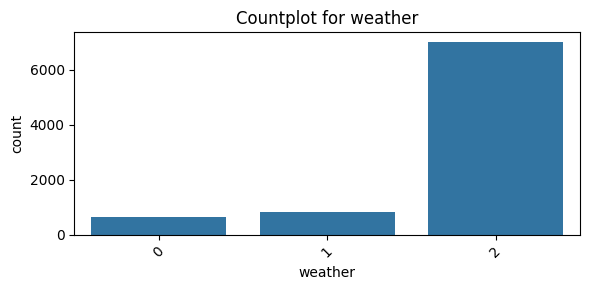

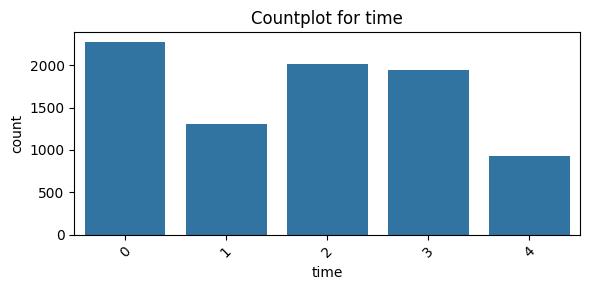

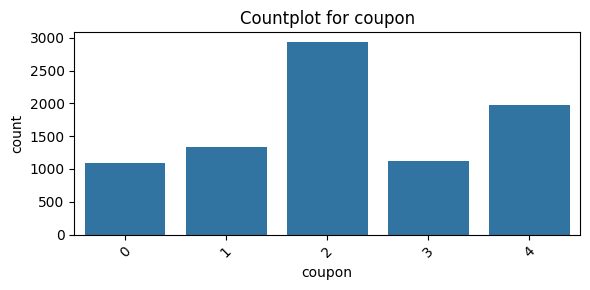

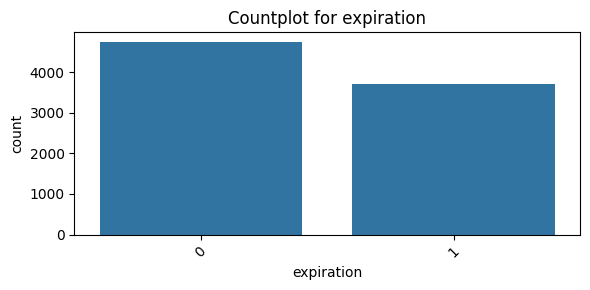

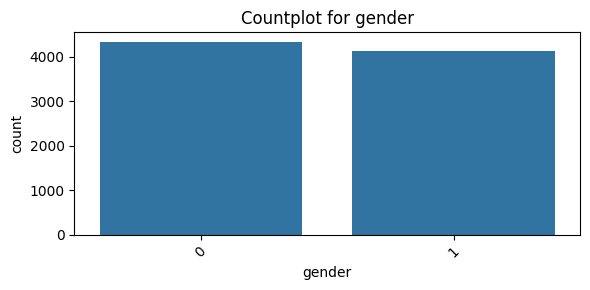

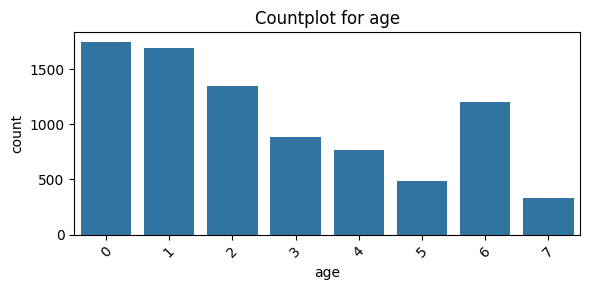

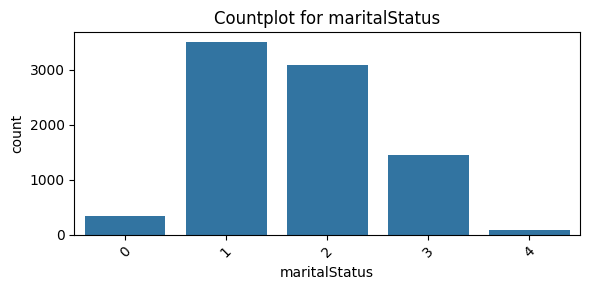

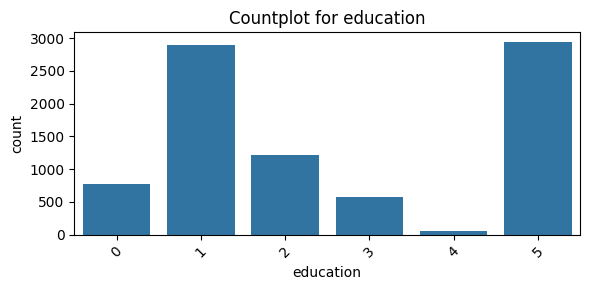

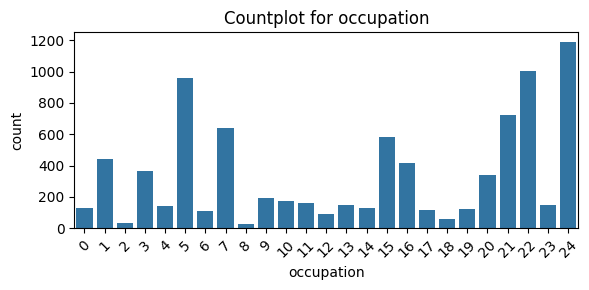

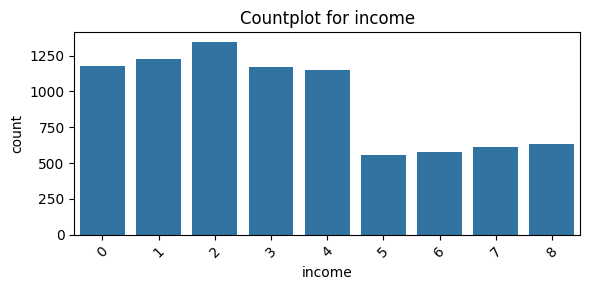

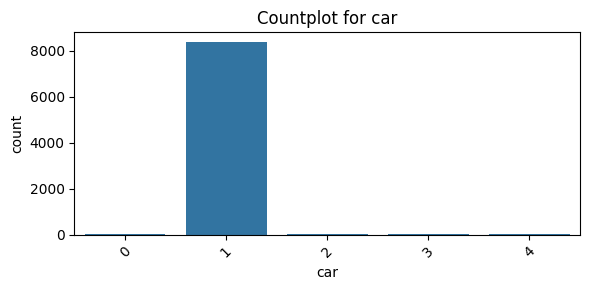

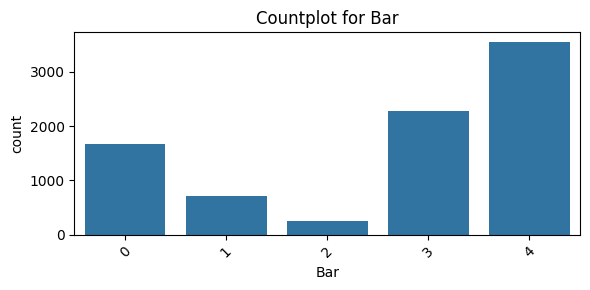

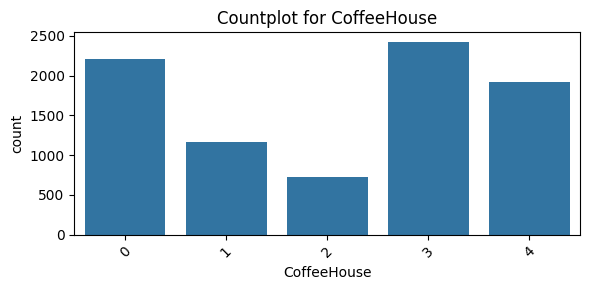

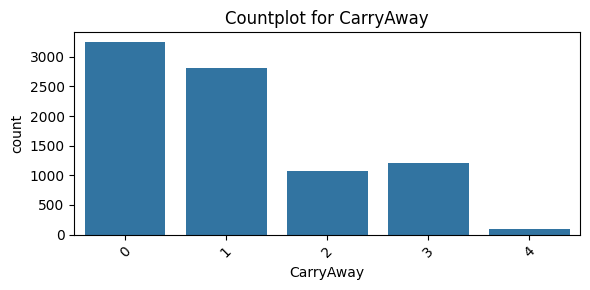

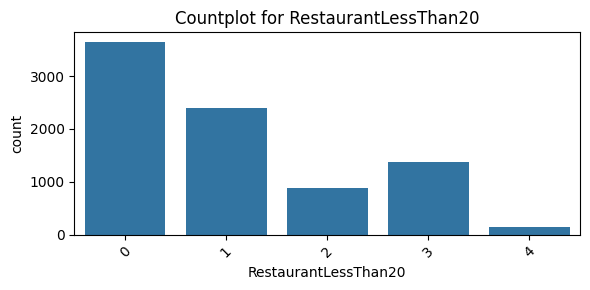

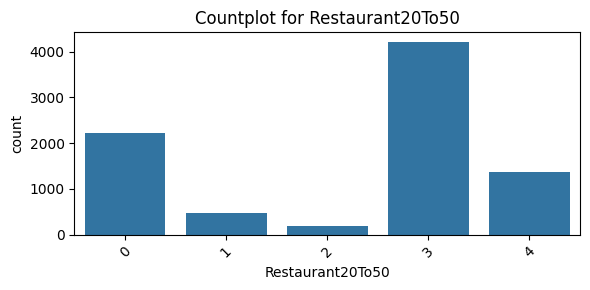

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
print("\n Histograms of Numerical Columns:")
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Count plots for categorical columns
print("\n Countplots of Categorical Columns:")
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=df[col])
    plt.title(f'Countplot for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




Step 13: Final Preprocessed Dataset

In [19]:
# View top 10 rows of the final cleaned dataset
print("\n Final Preprocessed Dataset (Top 10 rows):")
print(df.head(10))


 Final Preprocessed Dataset (Top 10 rows):
   destination  passanger  weather  temperature  time  coupon  expiration  \
0            1          0        2          0.5     2       4           0   
1            1          1        2          1.0     0       2           1   
2            1          1        2          1.0     0       1           1   
3            1          1        2          1.0     2       2           1   
4            1          1        2          1.0     2       2           0   
5            1          1        2          1.0     3       4           1   
6            1          1        2          0.5     2       1           0   
7            1          2        2          1.0     0       4           1   
8            1          2        2          1.0     0       1           1   
9            1          2        2          1.0     0       0           0   

   gender  age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0       0    0              3  ...            